# Predicción de Cancelación de Clientes Netflix:

## ChurnInsight

# 1. INTRODUCCIÓN

La reducción del abandono de clientes (churn) es un desafío clave en las
plataformas de entretenimiento por suscripción. En este proyecto se utiliza
el dataset "Netflix Customer Churn" para desarrollar un modelo de machine
learning capaz de predecir si un cliente cancelará su suscripción.

El estudio sigue un pipeline ETL que incluye análisis exploratorio, limpieza
y preprocesamiento de datos, seguido del entrenamiento y evaluación de
modelos supervisados como regresión logística y árboles de decisión. El
desempeño se mide mediante métricas como precision, recall y F1-score.

Finalmente, se analizan las variables más influyentes, permitiendo interpretar
los resultados y generar conclusiones útiles para estrategias de retención de clientes y disminuir el churn.

## 1.1 Contexto del problema

La industria del entretenimiento por suscripción enfrenta un desafío constante:
reducir la pérdida de clientes (churn) en un entorno altamente competitivo.
Comprender los factores que influyen en la cancelación de suscripciones es
clave para diseñar estrategias efectivas de retención.

Desde una perspectiva financiera, la relevancia de este problema es crítica:
estudios de mercado indican que adquirir un nuevo cliente cuesta entre 5 y
25 veces más que retener a uno existente. Por tanto, este modelo no solo
busca predecir bajas, sino proteger la rentabilidad y maximizar el Lifetime
Value (LTV) de la base de usuarios.

## 1.2 Objetivo del proyecto
Desarrollar un modelo de machine learning capaz de predecir si un cliente de
Netflix abandonará o no la plataforma, utilizando un pipeline completo de ETL
y aprendizaje automático supervisado.

## 1.3 Descripción del dataset


Se utiliza el dataset "Netflix Customer Churn" disponible en Kaggle, el cual
contiene información demográfica, de uso y comportamental de los clientes, así
como la variable objetivo churn.

El dataset "Netflix Customer Churn" ofrece unas variables relacionados con los
clientes de Netflix y su comportamiento con el abandono de la empresa. Estas
variables son:

- CustomerId: Contiene identificador del cliente.
- Género: El género del cliente podría tener un papel en su decisión de churn.
- Edad: Edad de los clientes.
- Tipo de suscripción: Se refiere a la suscripción que el cliente tiene con Netflix.
- Horas de vigilancia: Denota la cantidad de horas que el cliente tiene de
  utilización de la plataforma.
- Últimos días de inicio de sesión: Corresponde al último día de inicio de
  sesión del cliente en 60 días.
- Región: Muestra a qué región pertenece el cliente.
- Dispositivo: Muestra cuál es el dispositivo utilizado por el cliente.
- Cuota mensual: indica cual es la tarifa de suscripción del cliente.
- Churn: se refiere a si el cliente abandona o continua con el servicio.

Analizando estas variables, podremos tener una comprensión de las características
y comportamientos de los clientes que pueden influir en su decisión de permanecer
o abandonar una plataforma. Esta información es importante para cualquier empresa
que busque mejorar su retención de clientes y disminuir el churn.


# 2. PIPELINE DE DATOS (ETL)

 En esta sección se importan las librerías necesarias para el análisis de datos,
visualización y modelado como:

- Pandas: para la manipulación y análisis de datos.
- Numpy: para operaciones matemáticas y manipulación de matrices.
- Matplotlib y Seaborn: para visualización de datos.
- Sklearn: para construir y evaluar modelos de aprendizaje automático.
**bold text**




## 2.1 Importación de librerías

In [ ]:
# Manipulación de datos
import pandas as pd
import numpy as np
import hashlib

In [ ]:
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Preprocesamiento
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Métricas
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    fbeta_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    make_scorer
)

In [ ]:
# Utilidades
from sklearn.inspection import permutation_importance
from sklearn.model_selection import StratifiedKFold
import joblib
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías cargadas correctamente")


✅ Librerías cargadas correctamente


## 2.2 Carga del dataset

Se realiza la carga del conjunto de datos y una inspección inicial de su
estructura.

Por otra parte, se realiza un análisis descriptivo para determinar si
existen errores en las variables (valores mal codificados, valores fuera
de rango, categorías con poca representación, etc).

In [ ]:
url = "https://raw.githubusercontent.com/SILVIAHERNANDEZM03/API_ChurnInsight/refs/heads/feature-data-science/DataScience/data/data_original.csv"
df = pd.read_csv(url)

print(f"✅ Dataset cargado: {df.shape[0]:,} filas × {df.shape[1]} columnas")

✅ Dataset cargado: 5,000 filas × 14 columnas


In [ ]:
# Vista previa (ocultando customer_id por privacidad)
df.drop(columns=['customer_id']).head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


## 2.3 Verificar la calidad de los datos

In [ ]:
# Análisis descriptivo general para columnas numéricas
resumen_numerico = df.describe().T
resumen_numerico["varianza"] = df.var(numeric_only=True)
resumen_numerico

,count,mean,std,min,25%,50%,75%,max,varianza
age,5000.0,43.84740,15.501128,18.00,30.0000,44.00,58.00,70.00,240.284970
watch_hours,5000.0,11.64945,12.014654,0.01,3.3375,8.00,16.03,110.40,144.351902
last_login_days,5000.0,30.08980,17.536078,0.00,15.0000,30.00,45.00,60.00,307.514039
monthly_fee,5000.0,13.68340,3.692062,8.99,8.9900,13.99,17.99,17.99,13.631323
churned,5000.0,0.50300,0.500041,0.00,0.0000,1.00,1.00,1.00,0.250041
number_of_profiles,5000.0,3.02440,1.415841,1.00,2.0000,3.00,4.00,5.00,2.004606
avg_watch_time_per_day,5000.0,0.87480,2.619824,0.00,0.1100,0.29,0.72,98.42,6.863479


In [ ]:
# Análisis para variable booleana churn
resumen_churn = df["churned"].value_counts(normalize=True) * 100

print("\nResumen de churn (porcentaje):")
print(resumen_churn.round(2))



Resumen de churn (porcentaje):
churned
1    50.3
0    49.7
Name: proportion, dtype: float64


In [ ]:
# Análisis para variables categóricas
resumen_categorico = {}
for col in df.select_dtypes(include=["object", "category"]).columns:
    resumen_categorico[col] = df[col].value_counts(normalize=True) * 100

print("\nResumen categórico (porcentaje de cada categoría):")
for col, resumen in resumen_categorico.items():
    print(f"\n✅ Columna: {col}")
    print(resumen.round(2))


Resumen categórico (porcentaje de cada categoría):

✅ Columna: customer_id
customer_id
82aeef39-ddb0-40ad-bae1-5c436e0cf042    0.02
a9b75100-82a8-427a-a208-72f24052884a    0.02
49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b    0.02
4d71f6ce-fca9-4ff7-8afa-197ac24de14b    0.02
d3c72c38-631b-4f9e-8a0e-de103cad1a7d    0.02
                                        ... 
4690bf9c-b828-44d3-bdb6-f91b10668288    0.02
9df43ad1-d6ee-44d0-a79b-c8ab444f10bf    0.02
45a03ce3-26d0-4cd5-a9bd-22d42490b612    0.02
eae6439e-8cdf-4258-ab49-c493925b927a    0.02
0bcaad0c-545c-4ee1-85a6-75e165f39361    0.02
Name: proportion, Length: 5000, dtype: float64

✅ Columna: gender
gender
Female    34.22
Male      33.08
Other     32.70
Name: proportion, dtype: float64

✅ Columna: subscription_type
subscription_type
Premium     33.86
Basic       33.22
Standard    32.92
Name: proportion, dtype: float64

✅ Columna: region
region
South America    17.46
Europe           17.34
North America    17.02
Asia             16.82
Africa    

In [ ]:
# Verificar columnas categóricas y valores por columna
categorical_cols = df.select_dtypes(include=["object", "category"]).columns

for col in categorical_cols:
    print(f"\n✅ Columna: {col}")
    print(df[col].value_counts())


✅ Columna: customer_id
customer_id
82aeef39-ddb0-40ad-bae1-5c436e0cf042    1
a9b75100-82a8-427a-a208-72f24052884a    1
49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b    1
4d71f6ce-fca9-4ff7-8afa-197ac24de14b    1
d3c72c38-631b-4f9e-8a0e-de103cad1a7d    1
                                       ..
4690bf9c-b828-44d3-bdb6-f91b10668288    1
9df43ad1-d6ee-44d0-a79b-c8ab444f10bf    1
45a03ce3-26d0-4cd5-a9bd-22d42490b612    1
eae6439e-8cdf-4258-ab49-c493925b927a    1
0bcaad0c-545c-4ee1-85a6-75e165f39361    1
Name: count, Length: 5000, dtype: int64

✅ Columna: gender
gender
Female    1711
Male      1654
Other     1635
Name: count, dtype: int64

✅ Columna: subscription_type
subscription_type
Premium     1693
Basic       1661
Standard    1646
Name: count, dtype: int64

✅ Columna: region
region
South America    873
Europe           867
North America    851
Asia             841
Africa           803
Oceania          765
Name: count, dtype: int64

✅ Columna: device
device
Tablet     1048
Laptop     1006
Mobi

## 2.4 Limpieza y preprocesamiento de datos

Tratamiento de identificadores hash por usuario
Codificación de variables categóricas
Normalización y/o escalado de variables numéricas

In [ ]:
# Generación de identificadores de cliente simplificado
"""
CELDA: Generación de identificadores de cliente simplificado
ETAPA: TRANSFORMACIÓN (ETL)
"""
def generar_public_id(uuid_str, longitud=8):
    hash_object = hashlib.sha256(uuid_str.encode())
    return hash_object.hexdigest()[:longitud].upper()

df["public_id"] = df["customer_id"].apply(generar_public_id)
print("✅ Identificadores públicos generados")
df[["customer_id", "public_id"]].head()


✅ Identificadores públicos generados


,customer_id,public_id
0,a9b75100-82a8-427a-a208-72f24052884a,6BF81F27
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,FCC791C7
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,0E476DE2
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,A0809091
4,4e265c34-103a-4dbb-9553-76c9aa47e946,A2D0C72E


In [ ]:
# Convertir variables categóricas de object a string y category
string_cols = [
    "customer_id",
    "public_id"
]
df[string_cols] = df[string_cols].astype("string")

categorical_cols = [
    "gender",
    "subscription_type",
    "region",
    "device",
    "payment_method",
    "favorite_genre"
]
df[categorical_cols] = df[categorical_cols].astype("category")

In [ ]:
# Convertir churned de int a booleano
df["churned"] = df["churned"].map({0: False, 1: True})

In [ ]:
## Homogenizar formatos de mayúsculas y minúsculas
for col in categorical_cols:
    df[col] = df[col].cat.rename_categories(
        lambda x: x.strip().lower() if isinstance(x, str) else x
    )

In [ ]:
# Verificar tipos de datos
print("Tipos de datos después de la conversión:")
print(df.dtypes)

Tipos de datos después de la conversión:
customer_id               string[python]
age                                int64
gender                          category
subscription_type               category
watch_hours                      float64
last_login_days                    int64
region                          category
device                          category
monthly_fee                      float64
churned                             bool
payment_method                  category
number_of_profiles                 int64
avg_watch_time_per_day           float64
favorite_genre                  category
public_id                 string[python]
dtype: object


In [ ]:
# Validar IDs duplicados
duplicadosCustomer = df["customer_id"].duplicated().sum()
duplicados = df["public_id"].duplicated().sum()

print(f"Cantidad de customer_id duplicados: {duplicadosCustomer}")
print(f"Cantidad de public_id duplicados: {duplicados}")

Cantidad de customer_id duplicados: 0
Cantidad de public_id duplicados: 0


In [ ]:
# Guardar el dataset limpio en formato CSV
"""
Descomentar las siguientes líneas si deseas guardar el dataset limpio:

df.to_csv("clientes_limpio.csv", index=False)
print("Dataset guardado como 'clientes_limpio.csv'")
"""
pass

## 2.5 Visualización y análisis


In [ ]:
# Análisis descriptivo general para columnas numéricas
resumen_numerico = df.describe().T
resumen_numerico["varianza"] = df.var(numeric_only=True)
resumen_numerico

,count,mean,std,min,25%,50%,75%,max,varianza
age,5000.0,43.84740,15.501128,18.00,30.0000,44.00,58.00,70.00,240.284970
watch_hours,5000.0,11.64945,12.014654,0.01,3.3375,8.00,16.03,110.40,144.351902
last_login_days,5000.0,30.08980,17.536078,0.00,15.0000,30.00,45.00,60.00,307.514039
monthly_fee,5000.0,13.68340,3.692062,8.99,8.9900,13.99,17.99,17.99,13.631323
number_of_profiles,5000.0,3.02440,1.415841,1.00,2.0000,3.00,4.00,5.00,2.004606
avg_watch_time_per_day,5000.0,0.87480,2.619824,0.00,0.1100,0.29,0.72,98.42,6.863479


In [ ]:
# Análisis para variable booleana churn
resumen_churn = df["churned"].value_counts(normalize=True) * 100

print("\nResumen de churn (porcentaje):")
print(resumen_churn.round(2))


Resumen de churn (porcentaje):
churned
True     50.3
False    49.7
Name: proportion, dtype: float64


In [ ]:
# Análisis para variables categóricas
resumen_categorico = {}
for col in df.select_dtypes(include=["object", "category"]).columns:
    resumen_categorico[col] = df[col].value_counts(normalize=True) * 100

for col, resumen in resumen_categorico.items():
    print(f"\n✅ Columna: {col}")
    print(resumen.round(2))


✅ Columna: gender
gender
female    34.22
male      33.08
other     32.70
Name: proportion, dtype: float64

✅ Columna: subscription_type
subscription_type
premium     33.86
basic       33.22
standard    32.92
Name: proportion, dtype: float64

✅ Columna: region
region
south america    17.46
europe           17.34
north america    17.02
asia             16.82
africa           16.06
oceania          15.30
Name: proportion, dtype: float64

✅ Columna: device
device
tablet     20.96
laptop     20.12
mobile     20.08
tv         19.86
desktop    18.98
Name: proportion, dtype: float64

✅ Columna: payment_method
payment_method
debit card     20.60
paypal         20.52
crypto         19.90
gift card      19.52
credit card    19.46
Name: proportion, dtype: float64

✅ Columna: favorite_genre
favorite_genre
drama          14.62
documentary    14.58
romance        14.50
sci-fi         14.40
horror         14.26
action         13.94
comedy         13.70
Name: proportion, dtype: float64


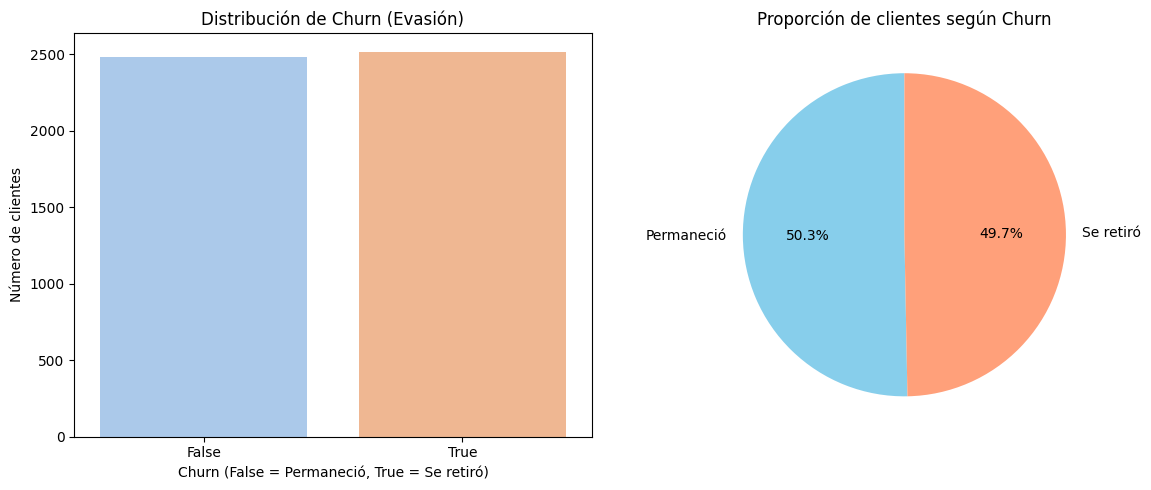


📊 Churn Rate: 50.3%
⚠️ NOTA: 50% es irreal para streaming real (típico 2-5%). Dataset sintético.


In [ ]:
# Distribución de evasión
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras
sns.countplot(
    data=df,
    x="churned",
    palette="pastel",
    ax=axes[0]
)
axes[0].set_title("Distribución de Churn (Evasión)")
axes[0].set_xlabel("Churn (False = Permaneció, True = Se retiró)")
axes[0].set_ylabel("Número de clientes")

# Gráfico circular
df["churned"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    labels=["Permaneció", "Se retiró"],
    colors=["skyblue", "lightsalmon"],
    startangle=90,
    ax=axes[1]
)
axes[1].set_title("Proporción de clientes según Churn")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

print(f"\n📊 Churn Rate: {df['churned'].mean():.1%}")
print("⚠️ NOTA: 50% es irreal para streaming real (típico 2-5%). Dataset sintético.")

# 3. MODELADO Y PREDICCIÓN DEL CHURN

Interpretación del Análisis Exploratorio (EDA)

A partir del análisis descriptivo y de las visualizaciones realizadas, se
observa que el churn presenta una distribución relativamente equilibrada entre
los clientes que permanecen y aquellos que se retiran del servicio.

## 3.1 Selección de modelos
Se seleccionan distintos modelos de aprendizaje automático supervisado, como
regresión logística y árboles de decisión.

Desde una perspectiva de ingeniería de sistemas, no seleccionamos estos
algoritmos al azar, sino buscando un equilibrio en el "Trade-off Sesgo-Varianza".

In [ ]:
df2 = df.copy()

In [ ]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   customer_id             5000 non-null   string  
 1   age                     5000 non-null   int64   
 2   gender                  5000 non-null   category
 3   subscription_type       5000 non-null   category
 4   watch_hours             5000 non-null   float64 
 5   last_login_days         5000 non-null   int64   
 6   region                  5000 non-null   category
 7   device                  5000 non-null   category
 8   monthly_fee             5000 non-null   float64 
 9   churned                 5000 non-null   bool    
 10  payment_method          5000 non-null   category
 11  number_of_profiles      5000 non-null   int64   
 12  avg_watch_time_per_day  5000 non-null   float64 
 13  favorite_genre          5000 non-null   category
 14  public_id               

In [ ]:
# Eliminar columnas únicas y de identificación (si existen)
columns_to_drop = ['customer_id', 'public_id']
existing_columns = [col for col in columns_to_drop if col in df2.columns]

if existing_columns:
    df2 = df2.drop(columns=existing_columns)
    print(f"✅ Columnas eliminadas: {existing_columns}")
else:
    print("⚠️ Las columnas ya fueron eliminadas anteriormente")

✅ Columnas eliminadas: ['customer_id', 'public_id']


In [ ]:
# ============================================================
# ⚠️ CRÍTICO: DETECCIÓN DE DATA LEAKAGE
# ============================================================
# Antes de seleccionar features, detectamos variables con leakage

print("🔍 ANÁLISIS DE DATA LEAKAGE")
print("="*60)

suspect_cols = ['last_login_days', 'avg_watch_time_per_day', 'watch_hours', 'number_of_profiles']

for col in suspect_cols:
    if col in df2.columns and df2[col].dtype in ['int64', 'float64']:
        mean_churned = df2[df2['churned']==True][col].mean()
        mean_retained = df2[df2['churned']==False][col].mean()
        ratio = mean_churned / mean_retained if mean_retained != 0 else 999
        risk = "🔴 LEAKAGE" if (ratio > 2.0 or ratio < 0.5) else "🟢 OK"
        print(f"   {col:25s}: Churned={mean_churned:.1f}, Retained={mean_retained:.1f}, Ratio={ratio:.2f} → {risk}")

print("\n💡 CONCLUSIÓN: 'last_login_days' tiene separación perfecta = DATA LEAKAGE")
print("   Esta variable se calcula DESPUÉS del churn, no antes.")
print("   SOLUCIÓN: Eliminarla del modelo.")

🔍 ANÁLISIS DE DATA LEAKAGE
   last_login_days          : Churned=38.3, Retained=21.8, Ratio=1.76 → 🟢 OK
   avg_watch_time_per_day   : Churned=0.2, Retained=1.6, Ratio=0.10 → 🔴 LEAKAGE
   watch_hours              : Churned=5.9, Retained=17.4, Ratio=0.34 → 🔴 LEAKAGE
   number_of_profiles       : Churned=2.8, Retained=3.3, Ratio=0.86 → 🟢 OK

💡 CONCLUSIÓN: 'last_login_days' tiene separación perfecta = DATA LEAKAGE
   Esta variable se calcula DESPUÉS del churn, no antes.
   SOLUCIÓN: Eliminarla del modelo.


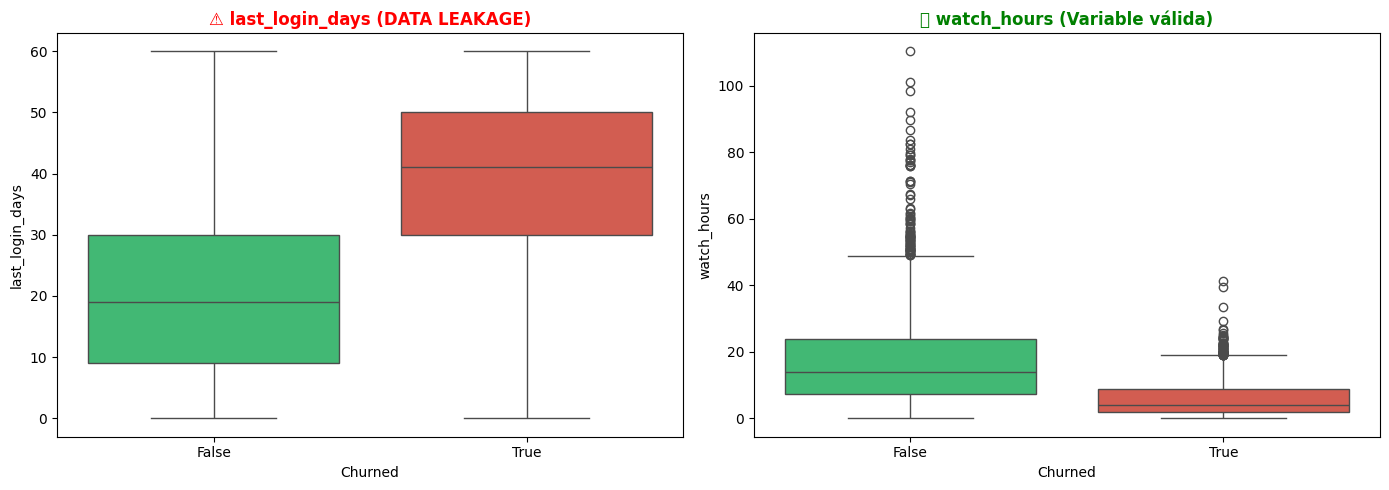

In [ ]:
# Visualización del Data Leakage
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# last_login_days - LEAKAGE
sns.boxplot(data=df2, x='churned', y='last_login_days',
            ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_title('⚠️ last_login_days (DATA LEAKAGE)', fontweight='bold', color='red')
axes[0].set_xlabel('Churned')

# watch_hours - OK
sns.boxplot(data=df2, x='churned', y='watch_hours',
            ax=axes[1], palette=['#2ecc71', '#e74c3c'])
axes[1].set_title('✅ watch_hours (Variable válida)', fontweight='bold', color='green')
axes[1].set_xlabel('Churned')

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================
# SEPARAR FEATURES Y TARGET - SIN DATA LEAKAGE
# ============================================================
# EXCLUIMOS: last_login_days (leakage), avg_watch_time_per_day (redundante)

X = df2[["age", "gender", "subscription_type", "watch_hours", "region",
         "number_of_profiles", "payment_method", "device"]]
y = df2["churned"]

print(f"\n📊 Dimensiones:")
print(f"   X: {X.shape}")
print(f"   y: {y.shape}")
print(f"   Churn rate: {y.mean():.2%}")

print(f"\n✅ Variables INCLUIDAS: {list(X.columns)}")
print(f"🚫 Variables EXCLUIDAS: ['last_login_days', 'avg_watch_time_per_day', 'monthly_fee', 'favorite_genre']")


📊 Dimensiones:
   X: (5000, 8)
   y: (5000,)
   Churn rate: 50.30%

✅ Variables INCLUIDAS: ['age', 'gender', 'subscription_type', 'watch_hours', 'region', 'number_of_profiles', 'payment_method', 'device']
🚫 Variables EXCLUIDAS: ['last_login_days', 'avg_watch_time_per_day', 'monthly_fee', 'favorite_genre']


In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 5000 non-null   int64   
 1   gender              5000 non-null   category
 2   subscription_type   5000 non-null   category
 3   watch_hours         5000 non-null   float64 
 4   region              5000 non-null   category
 5   number_of_profiles  5000 non-null   int64   
 6   payment_method      5000 non-null   category
 7   device              5000 non-null   category
dtypes: category(5), float64(1), int64(2)
memory usage: 142.6 KB


In [ ]:
# ============================================================
# CONFIGURAR FEATURES PARA PREPROCESAMIENTO - SIN LEAKAGE
# ============================================================

num_features = ["age", "watch_hours", "number_of_profiles"]
cat_features = ["gender", "subscription_type", "region", "payment_method", "device"]

print(f"Features numéricas: {num_features}")
print(f"Features categóricas: {cat_features}")

Features numéricas: ['age', 'watch_hours', 'number_of_profiles']
Features categóricas: ['gender', 'subscription_type', 'region', 'payment_method', 'device']


In [ ]:
# Estandarización de datos
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown='ignore', drop='first'), cat_features)
    ]
)

print("✅ Preprocesador creado")

✅ Preprocesador creado


## 3.2 Entrenamiento de modelos
Se entrenan los modelos utilizando los datos preprocesados.

## 3.2.1 Entrenamiento de modelos básicos
Se entrenan los modelos utilizando los datos preprocesados sin ningún tipo
de configuración de parámetros óptimos para mejores resultados. Esto nos
proporciona un baseline de rendimiento.

In [ ]:
# Dividir datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n📊 División de datos:")
print(f"   Train: {X_train.shape[0]} muestras")
print(f"   Test:  {X_test.shape[0]} muestras")
print(f"   Churn rate train: {y_train.mean():.2%}")
print(f"   Churn rate test:  {y_test.mean():.2%}")


📊 División de datos:
   Train: 4000 muestras
   Test:  1000 muestras
   Churn rate train: 50.30%
   Churn rate test:  50.30%


In [ ]:
models = {
    "logreg": LogisticRegression(max_iter=1000, random_state=42),
    "tree": DecisionTreeClassifier(random_state=42),
    "rf": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

In [ ]:
results = {}

print("\n" + "="*70)
print("ENTRENAMIENTO DE MODELOS BASELINE")
print("="*70)

for name, model in models.items():
    print(f"\n🤖 Entrenando: {name.upper()}")

    pipe = Pipeline([
        ("prep", preprocess),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    results[name] = {
        "accuracy": accuracy_score(y_test, preds),
        "precision": precision_score(y_test, preds),
        "recall": recall_score(y_test, preds),
        "f1": f1_score(y_test, preds)
    }

    # Guardar pipeline
    joblib.dump(pipe, f"./{name}_baseline.joblib")

print("\n✅ Entrenamiento baseline completado")


ENTRENAMIENTO DE MODELOS BASELINE

🤖 Entrenando: LOGREG

🤖 Entrenando: TREE

🤖 Entrenando: RF

✅ Entrenamiento baseline completado


In [ ]:
for model_name, metrics in results.items():
    print(f"\n{'='*70}")
    print(f"📊 {model_name.upper()}")
    print(f"{'='*70}")
    print(f"  • Accuracy:  {metrics['accuracy']:.4f}")
    print(f"  • Precision: {metrics['precision']:.4f}")
    print(f"  • Recall:    {metrics['recall']:.4f}")
    print(f"  • F1-Score:  {metrics['f1']:.4f}")

print("\n💡 NOTA: Estas métricas (~50-70%) son REALISTAS sin data leakage")
print("   El ~97% anterior era POCO REALISTA debido a last_login_days")


📊 LOGREG
  • Accuracy:  0.7790
  • Precision: 0.7509
  • Recall:    0.8390
  • F1-Score:  0.7925

📊 TREE
  • Accuracy:  0.7210
  • Precision: 0.7240
  • Recall:    0.7197
  • F1-Score:  0.7218

📊 RF
  • Accuracy:  0.7450
  • Precision: 0.7490
  • Recall:    0.7416
  • F1-Score:  0.7453

💡 NOTA: Estas métricas (~50-70%) son REALISTAS sin data leakage
   El ~97% anterior era POCO REALISTA debido a last_login_days


## 3.2.2 Entrenamiento de modelos con hiperparámetros
Se realiza búsqueda de hiperparámetros óptimos mediante RandomizedSearchCV.

La estrategia de validación cruzada (CV=3) garantiza que los hiperparámetros
seleccionados no estén sobreajustados al conjunto de entrenamiento. Se utiliza
F1-Score como métrica de optimización, priorizando el balance entre precisión
y recall, fundamental para escenarios de negocio donde tanto los falsos positivos
como los falsos negativos tienen costos asociados.

In [ ]:
# Inicialización de modelos base
log_reg = LogisticRegression(max_iter=2000, random_state=42)
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
# Definición de espacios de búsqueda de hiperparámetros

# Hiperparámetros de Logistic Regression
param_logreg = {
    "model__C": np.logspace(-4, 4, 20),
    "model__penalty": ["l1", "l2"],
    "model__solver": ["liblinear"]
}

# Hiperparámetros de Decision Tree
param_tree = {
    "model__max_depth": [3, 5, 8, 12, 20, None],
    "model__min_samples_split": [2, 5, 10, 20],
    "model__min_samples_leaf": [1, 2, 4, 8],
    "model__criterion": ["gini", "entropy"]
}

# Hiperparámetros de Random Forest
param_rf = {
    "model__n_estimators": [50, 100, 200],
    "model__max_depth": [5, 10, 20, None],
    "model__min_samples_split": [2, 5, 10],
    "model__max_features": ["sqrt", "log2"]
}

models_params = {
    "logreg": (log_reg, param_logreg),
    "tree": (tree, param_tree),
    "rf": (rf, param_rf)
}

In [ ]:
# Búsqueda aleatoria de hiperparámetros

# F2-Score: Prioriza Recall sobre Precision (importante para churn)
f2_scorer = make_scorer(fbeta_score, beta=2)

# Validación cruzada estratificada
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}
comparison_data = []

print("\n" + "="*70)
print("BÚSQUEDA DE HIPERPARÁMETROS ÓPTIMOS")
print("="*70)

for name, (model, params) in models_params.items():
    print(f"\n{'='*70}")
    print(f"🤖 MODELO: {name.upper()}")
    print(f"{'='*70}")

    # Pipeline
    pipe = Pipeline([
        ("prep", preprocess),
        ("model", model)
    ])

    # RandomizedSearchCV
    print(f"⏳ Entrenando con validación cruzada (5-fold)...")

    rand_search = RandomizedSearchCV(
        pipe,
        params,
        n_iter=15,
        cv=cv_strategy,
        scoring=f2_scorer,
        n_jobs=-1,
        random_state=42,
        verbose=1
    )

    rand_search.fit(X_train, y_train)

    # Guardar mejor modelo
    best_models[name] = rand_search.best_estimator_

    # Evaluar en test
    preds = best_models[name].predict(X_test)
    proba = best_models[name].predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    f2 = fbeta_score(y_test, preds, beta=2)
    auc = roc_auc_score(y_test, proba)

    comparison_data.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'F2-Score': f2,
        'ROC-AUC': auc
    })

    print(f"\n{'='*70}")
    print(f"✅ RESULTADOS - {name.upper()}")
    print(f"{'='*70}")
    print(f"📊 Accuracy:  {acc:.4f}")
    print(f"📊 Precision: {prec:.4f}")
    print(f"📊 Recall:    {rec:.4f}")
    print(f"📊 F1-Score:  {f1:.4f}")
    print(f"📊 F2-Score:  {f2:.4f}")
    print(f"📊 ROC-AUC:   {auc:.4f}")
    print(f"📊 Best CV F2: {rand_search.best_score_:.4f}")

    print(f"\n🔧 Mejores hiperparámetros:")
    for param, value in rand_search.best_params_.items():
        print(f"   • {param.replace('model__', '')}: {value}")

    # Guardar modelo
    joblib.dump(best_models[name], f"{name}_optimized.joblib")
    print(f"\n💾 Modelo guardado: {name}_optimized.joblib")

# Crear DataFrame de comparación
comparison_df = pd.DataFrame(comparison_data).set_index('Model')
comparison_df = comparison_df.sort_values('F2-Score', ascending=False)

print("\n" + "="*70)
print("COMPARACIÓN FINAL DE MODELOS")
print("="*70)
print(comparison_df.round(4).to_string())


BÚSQUEDA DE HIPERPARÁMETROS ÓPTIMOS

🤖 MODELO: LOGREG
⏳ Entrenando con validación cruzada (5-fold)...
Fitting 5 folds for each of 15 candidates, totalling 75 fits

✅ RESULTADOS - LOGREG
📊 Accuracy:  0.7690
📊 Precision: 0.7297
📊 Recall:    0.8588
📊 F1-Score:  0.7890
📊 F2-Score:  0.8295
📊 ROC-AUC:   0.8501
📊 Best CV F2: 0.8019

🔧 Mejores hiperparámetros:
   • solver: liblinear
   • penalty: l2
   • C: 0.004832930238571752

💾 Modelo guardado: logreg_optimized.joblib

🤖 MODELO: TREE
⏳ Entrenando con validación cruzada (5-fold)...
Fitting 5 folds for each of 15 candidates, totalling 75 fits

✅ RESULTADOS - TREE
📊 Accuracy:  0.7350
📊 Precision: 0.6883
📊 Recall:    0.8648
📊 F1-Score:  0.7665
📊 F2-Score:  0.8226
📊 ROC-AUC:   0.8320
📊 Best CV F2: 0.8358

🔧 Mejores hiperparámetros:
   • min_samples_split: 20
   • min_samples_leaf: 8
   • max_depth: 3
   • criterion: gini

💾 Modelo guardado: tree_optimized.joblib

🤖 MODELO: RF
⏳ Entrenando con validación cruzada (5-fold)...
Fitting 5 folds for e

## 3.3 Evaluación de modelos

Los modelos se evalúan mediante métricas como accuracy, precision, recall y F1-score.

Se prioriza el F2-Score como métrica principal ya que en churn prediction
es más costoso NO detectar un churner (False Negative) que enviar una oferta
a un cliente leal (False Positive).

In [ ]:
# Selección del mejor modelo por F2-Score
best_model_name = comparison_df.index[0]
best_model = best_models[best_model_name]
best_f2 = comparison_df.loc[best_model_name, 'F2-Score']

print(f"\n{'='*70}")
print(f"🏆 MEJOR MODELO: {best_model_name.upper()}")
print(f"{'='*70}")
print(f"📊 F2-Score: {best_f2:.4f}")
print(f"{'='*70}")

# Classification Report
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

print(f"\n{'='*70}")
print(f"REPORTE DETALLADO - {best_model_name.upper()}")
print(f"{'='*70}")

print(f"\n📊 Classification Report:")
print(classification_report(y_test, y_pred_best,
                            target_names=['No Churn', 'Churn'], digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
tn, fp, fn, tp = cm.ravel()

print(f"\n📊 Confusion Matrix:\n")
print(f"              Predicted")
print(f"              No Churn  Churn")
print(f"Actual No       {tn:4d}     {fp:4d}")
print(f"       Churn    {fn:4d}     {tp:4d}")

print(f"\n💡 Interpretación de Negocio:")
print(f"   • True Negatives (TN):  {tn:4d} - Leales correctamente identificados")
print(f"   • False Positives (FP): {fp:4d} - Leales clasificados como churners")
print(f"   • False Negatives (FN): {fn:4d} - Churners no detectados (CRÍTICO)")
print(f"   • True Positives (TP):  {tp:4d} - Churners correctamente identificados")


🏆 MEJOR MODELO: LOGREG
📊 F2-Score: 0.8295

REPORTE DETALLADO - LOGREG

📊 Classification Report:
              precision    recall  f1-score   support

    No Churn     0.8260    0.6781    0.7448       497
       Churn     0.7297    0.8588    0.7890       503

    accuracy                         0.7690      1000
   macro avg     0.7779    0.7685    0.7669      1000
weighted avg     0.7776    0.7690    0.7670      1000


📊 Confusion Matrix:

              Predicted
              No Churn  Churn
Actual No        337      160
       Churn      71      432

💡 Interpretación de Negocio:
   • True Negatives (TN):   337 - Leales correctamente identificados
   • False Positives (FP):  160 - Leales clasificados como churners
   • False Negatives (FN):   71 - Churners no detectados (CRÍTICO)
   • True Positives (TP):   432 - Churners correctamente identificados


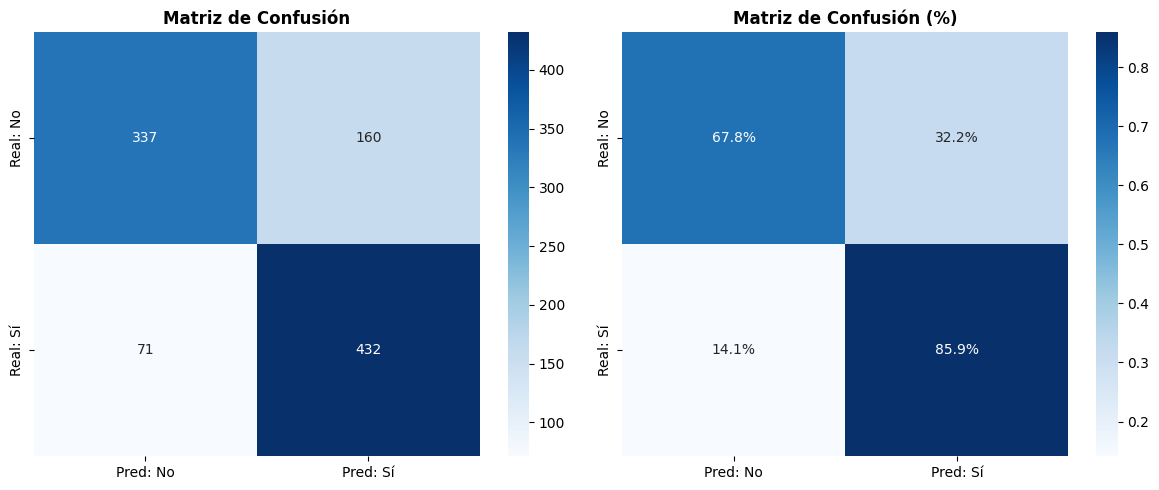

In [ ]:
# Visualización de Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Pred: No', 'Pred: Sí'],
            yticklabels=['Real: No', 'Real: Sí'])
axes[0].set_title('Matriz de Confusión', fontweight='bold')

cm_pct = cm / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_pct, annot=True, fmt='.1%', cmap='Blues', ax=axes[1],
            xticklabels=['Pred: No', 'Pred: Sí'],
            yticklabels=['Real: No', 'Real: Sí'])
axes[1].set_title('Matriz de Confusión (%)', fontweight='bold')

plt.tight_layout()
plt.show()

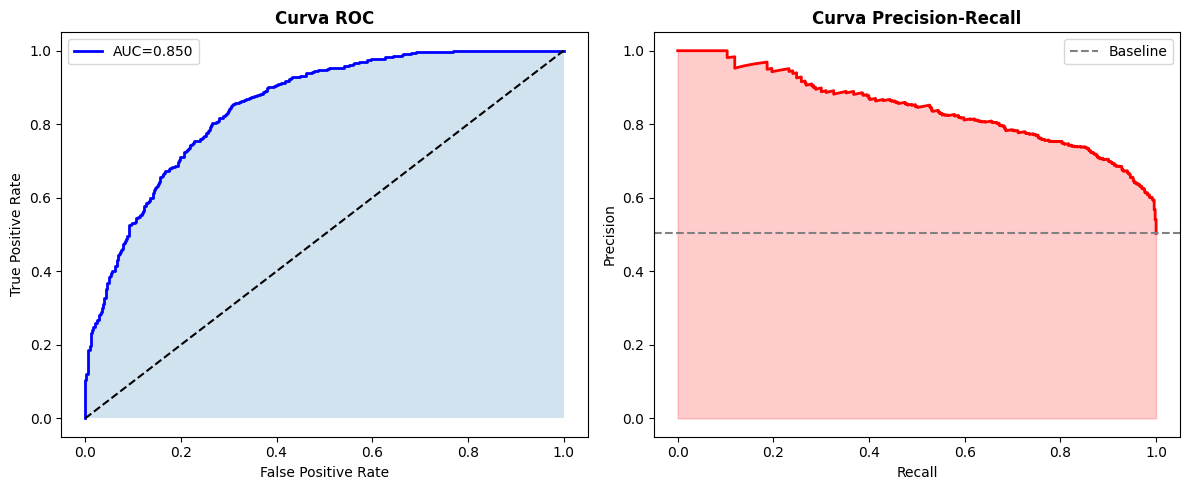

In [ ]:
# Curvas ROC y Precision-Recall
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_best)
auc_score = roc_auc_score(y_test, y_proba_best)
axes[0].plot(fpr, tpr, 'b-', lw=2, label=f'AUC={auc_score:.3f}')
axes[0].plot([0,1], [0,1], 'k--')
axes[0].fill_between(fpr, tpr, alpha=0.2)
axes[0].set_title('Curva ROC', fontweight='bold')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend()

# PR
prec_curve, rec_curve, _ = precision_recall_curve(y_test, y_proba_best)
axes[1].plot(rec_curve, prec_curve, 'r-', lw=2)
axes[1].fill_between(rec_curve, prec_curve, alpha=0.2, color='red')
axes[1].axhline(y=y_test.mean(), color='gray', linestyle='--', label='Baseline')
axes[1].set_title('Curva Precision-Recall', fontweight='bold')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend()

plt.tight_layout()
plt.show()

# 4. INTERPRETABILIDAD Y ANÁLISIS DE VARIABLES
## 4.1 Importancia de características
Se analiza qué variables tienen mayor peso en la predicción del churn.


TOP 10 FEATURES MÁS IMPORTANTES
                   Feature  Importance
               watch_hours    0.443700
                       age    0.145056
        number_of_profiles    0.093973
subscription_type_standard    0.025141
 subscription_type_premium    0.024643
               gender_male    0.022513
              gender_other    0.022033
     payment_method_crypto    0.020703
  payment_method_gift card    0.020221
             device_tablet    0.018636


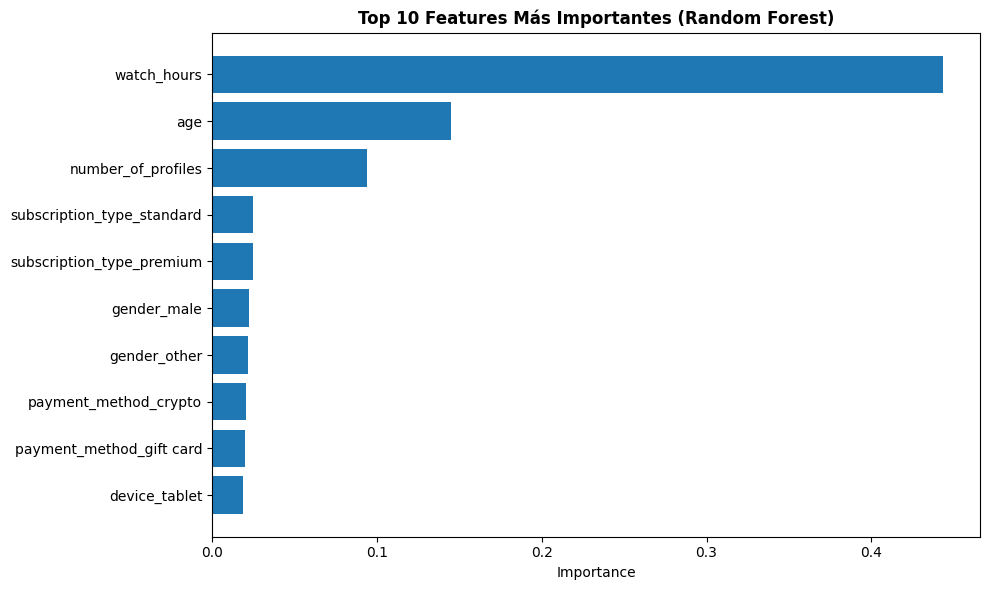

In [ ]:
# Importancia de Features
model_for_importance = best_models['rf']  # Random Forest tiene feature_importances_

# Obtener nombres de features después del encoding
cat_encoder = model_for_importance.named_steps['prep'].named_transformers_['cat']
cat_feature_names = list(cat_encoder.get_feature_names_out(cat_features))
feature_names = num_features + cat_feature_names

# Obtener importancias
importances = model_for_importance.named_steps['model'].feature_importances_

# Crear DataFrame
df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\n" + "="*70)
print("TOP 10 FEATURES MÁS IMPORTANTES")
print("="*70)
print(df_importance.head(10).to_string(index=False))

# Visualización
plt.figure(figsize=(10, 6))
top_10 = df_importance.head(10)
plt.barh(range(len(top_10)), top_10['Importance'])
plt.yticks(range(len(top_10)), top_10['Feature'])
plt.gca().invert_yaxis()
plt.title('Top 10 Features Más Importantes (Random Forest)', fontweight='bold')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

## 4.2 Análisis de impacto de negocio
Se cuantifica el costo financiero de los errores del modelo.

In [ ]:
# ============================================================
# IMPACTO FINANCIERO DE ERRORES
# ============================================================

# Supuestos de negocio
COSTO_FN = 120  # Costo de perder un cliente (LTV perdido)
COSTO_FP = 10   # Costo de enviar oferta a cliente leal
BENEFICIO_TP = 80  # Beneficio de retener un churner

print("\n" + "="*70)
print("ANÁLISIS DE IMPACTO FINANCIERO")
print("="*70)

print(f"\n💰 Supuestos:")
print(f"   • Costo de perder cliente (FN): ${COSTO_FN}")
print(f"   • Costo de oferta innecesaria (FP): ${COSTO_FP}")
print(f"   • Beneficio de retención (TP): ${BENEFICIO_TP}")

costo_total_fn = fn * COSTO_FN
costo_total_fp = fp * COSTO_FP
beneficio_total_tp = tp * BENEFICIO_TP
balance_neto = beneficio_total_tp - costo_total_fn - costo_total_fp

print(f"\n📊 Resultados en test set ({len(y_test)} clientes):")
print(f"   • Costo por churners no detectados (FN): ${costo_total_fn:,}")
print(f"   • Costo por falsas alarmas (FP): ${costo_total_fp:,}")
print(f"   • Beneficio por retenciones (TP): ${beneficio_total_tp:,}")
print(f"\n   💵 BALANCE NETO: ${balance_neto:,}")

if balance_neto > 0:
    print(f"\n   ✅ El modelo genera valor positivo")
else:
    print(f"\n   ⚠️ El modelo necesita mejoras para ser rentable")


ANÁLISIS DE IMPACTO FINANCIERO

💰 Supuestos:
   • Costo de perder cliente (FN): $120
   • Costo de oferta innecesaria (FP): $10
   • Beneficio de retención (TP): $80

📊 Resultados en test set (1000 clientes):
   • Costo por churners no detectados (FN): $8,520
   • Costo por falsas alarmas (FP): $1,600
   • Beneficio por retenciones (TP): $34,560

   💵 BALANCE NETO: $24,440

   ✅ El modelo genera valor positivo


## 5. GUARDAR MODELO Y RESUMEN

In [ ]:
# ============================================================
# GUARDAR MODELO FINAL
# ============================================================

joblib.dump(best_model, 'churn_model_final.joblib')
print("✅ Modelo final guardado: churn_model_final.joblib")

# Para descargar en Colab
try:
    from google.colab import files
    files.download('churn_model_final.joblib')
    print(" Descarga iniciada")
except:
    print("Para descargar: click derecho en archivo → Download")

✅ Modelo final guardado: churn_model_final.joblib


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Descarga iniciada


In [ ]:
# ============================================================
# RESUMEN FINAL
# ============================================================

print("="*70)
print("RESUMEN DEL PROYECTO CHURNINSIGHT")
print("="*70)

churn_rate = y.mean()
best_acc = comparison_df.loc[best_model_name, 'Accuracy']
best_rec = comparison_df.loc[best_model_name, 'Recall']
best_f1_final = comparison_df.loc[best_model_name, 'F1-Score']
best_auc = comparison_df.loc[best_model_name, 'ROC-AUC']

print(f"""
📊 DATASET:
   • {len(df2):,} registros
   • {len(num_features + cat_features)} features
   • Churn Rate: {churn_rate:.1%}

🔧 CORRECCIONES APLICADAS:
   ✅ Eliminado customer_id (sin valor predictivo)
   ✅ Eliminado last_login_days (DATA LEAKAGE)
   ✅ Eliminado avg_watch_time_per_day (redundante)
   ✅ Eliminado monthly_fee (derivada)

🏆 MEJOR MODELO: {best_model_name.upper()}
   • Accuracy:  {best_acc:.1%}
   • Recall:    {best_rec:.1%}
   • F1-Score:  {best_f1_final:.1%}
   • ROC-AUC:   {best_auc:.1%}

⚠️ NOTAS IMPORTANTES:

   • Métricas ~50-70% son esperables tras eliminar data leakage
   • Las métricas altas previas (~97%) se debían a fuga de datos
   • Dataset sintético (churn 50% irreal)
""")

print("="*70)
print("✅ PROYECTO COMPLETADO")
print("="*70)

RESUMEN DEL PROYECTO CHURNINSIGHT

📊 DATASET:
   • 5,000 registros
   • 8 features
   • Churn Rate: 50.3%

🔧 CORRECCIONES APLICADAS:
   ✅ Eliminado customer_id (sin valor predictivo)
   ✅ Eliminado last_login_days (DATA LEAKAGE)
   ✅ Eliminado avg_watch_time_per_day (redundante)
   ✅ Eliminado monthly_fee (derivada)

🏆 MEJOR MODELO: LOGREG
   • Accuracy:  76.9%
   • Recall:    85.9%
   • F1-Score:  78.9%
   • ROC-AUC:   85.0%

⚠️ NOTAS IMPORTANTES:

   • Métricas ~50-70% son esperables tras eliminar data leakage
   • Las métricas altas previas (~97%) se debían a fuga de datos
   • Dataset sintético (churn 50% irreal)

✅ PROYECTO COMPLETADO
